# Task 1 - Data Preparation
For this task, you will perform the following steps:
- Load all the necessary packages for this exercise
- Load the data
- Split the data into input features and the target variable
- Split the data into training and validation datasets

In [1]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for train-validation split
from sklearn.model_selection import train_test_split

# Importing packages for building ensemble models
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Import 'GridSearchCV' for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import suitable performance metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, roc_auc_score

In [2]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
teadata = pd.read_csv('MLTeaInc_DT.csv')
teadata.head(2)

,Gender_Male,Gender_Female,Married_Yes,Married_No,Income,Age,Preference
0,0,1,0,1,31779,46,Sweetened
1,1,0,1,0,32739,50,Sweetened


In [8]:
teadata['Preference_map'] = teadata['Preference'].map({'Unsweetened': 1, 'Sweetened': 0})

In [9]:
# Split the data into input features and the target variable
# Note: The target variable here is the 'Preference' feature
# Note: The class 'Unsweetened' is the class of interest or the positive class in this exercise
X = teadata.drop(columns=['Preference', 'Preference_map'], axis=1)
y = teadata['Preference_map']

In [10]:
# Split the data into training, validation and testing datasets using the 'train_test_split()' method
# Hint: Study the documentation of the 'train_test_split()' method
# Note: Use 'test_size = 0.5' and 'random_state = 0'
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

# Task 2 - Building Classification Models
For this task, you will perform the following steps:

- Part 1
  - Build and analyze a random forest model for the data with:
    - Default parameters
    - Hyperparameter tuning using *GridSearchCV()* on *n_estimators* and max_depth

- Part 2
  - Build and analyze a LightGBM model for the data with:
    - Default parameters
    - Hyperparameter tuning using *GridSearchCV()* on combination of *n_estimators*, *max_depth* and *learning_rate*

## Part 1 - Random Forest Models

### Sub-task 1 - Random Forest Model - I

For this sub-task, you will perform the following steps:
- Build a random forest model for the data using the *RandomForestClassifier()* method with the default parameters
- Visualize the confusion matrices for the training and validation sets

In [11]:
# Create a random forest classifier for the data using the 'RandomForestClassifier()' method
# Hint: Study the documentation of the 'RandomForestClassifier()' method
# Note: Use the default values for all parameters
# Note: Use 'random_state = 0'
rf1 = RandomForestClassifier(random_state=0)
rf1 = rf1.fit(X_train, y_train)

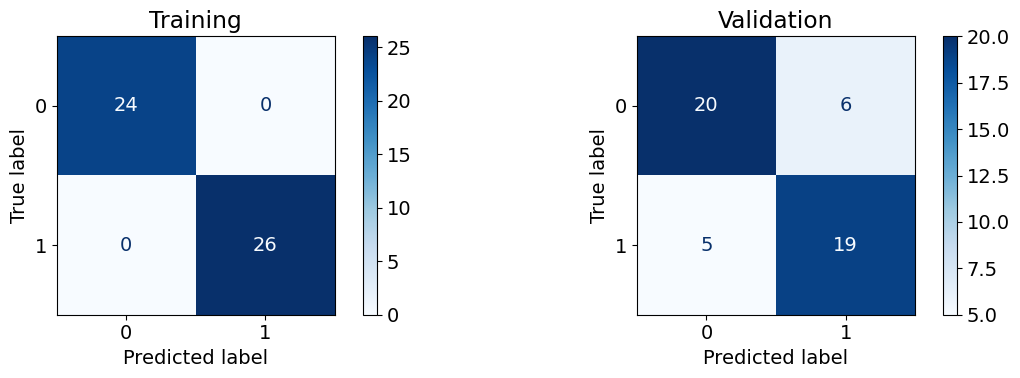

In [12]:
# Display the confusion matrices for 'rf1' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf1, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf1, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation')
plt.tight_layout();

### Sub-task 3 - Random Forest Model - II
For this sub-task, you will perform the following steps:
- Build a random forest model for the data using the *RandomForestClassifier()* method and tune it on the number of estimators and the maximum tree depth parameters using the *GridSearchCV()* method
- Visualize the confusion matrices for the training and validation sets

In [13]:
# Initialize a basic random forest object using the 'RandomForestClassifier()' method
# Hint: Study the documentation of the 'RandomForestClassifier()' method
# Note: Use 'random_state = 0'
base_rf_model = rf_classifier = RandomForestClassifier(random_state=0)

# Define the range of the 'n_estimators' and the 'max_depth' parameters and store them in a parameter grid dictionary
parameters_grid = {'n_estimators': np.arange(5, 55, 5), 'max_depth': np.arange(2, 5, 1)}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Hint: Study the documentation of the 'GridSearchCV()' method
# Hint: The 'estimator' parameter should be set to the base random forest model on which tuning is to be performed
# Hint: The 'param_grid' parameter should be set to the grid of parameters on which tuning is to be performed
# Note: Use 'scoring = accuracy' and 'cv = 2'
grid = GridSearchCV(estimator=base_rf_model, param_grid=parameters_grid, scoring='accuracy', cv=2)

# Train a model using the training data
# Note: Execution times for grid searches are exponentially proportional to the number of hyperparameters being tuned for
# Note: This cell might take a few minutes to run
rf2 = grid.fit(X_train, y_train)

In [17]:
# Print the optimal value of 'n_estimators' and 'max_depth' obtained from 'rf2'
# Hint: Use the 'best_params_' attribute of the 'rf2' object and look for 'n_estimators' and 'max_depth'
best_n_estimators = rf2.best_params_['n_estimators']
best_max_depth = rf2.best_params_['max_depth']

print('The optimal value of n_estimators is', best_n_estimators)
print('The optimal value of max_depth is', best_max_depth)

The optimal value of n_estimators is 10
The optimal value of max_depth is 2


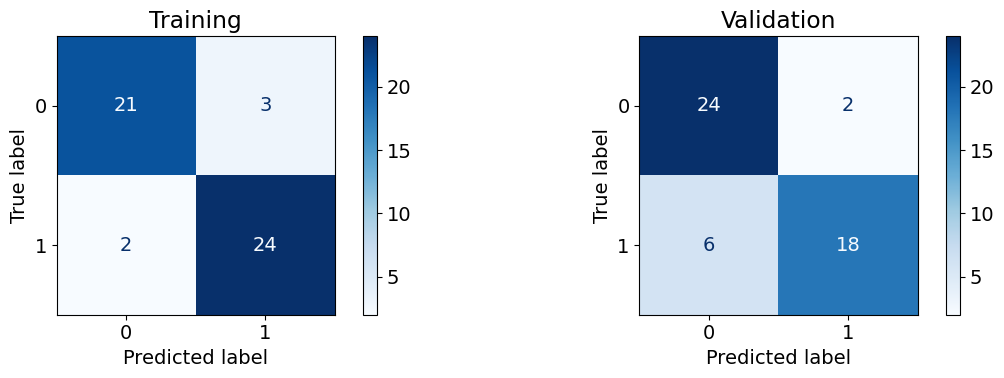

In [18]:
# Display the confusion matrices for 'rf2' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(rf2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(rf2, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation')
plt.tight_layout();

## Part 2 - Gradient Boosted Tree Models
### Sub-task 1 - Gradient Boosted Tree Model - I
For this sub-task, you will perform the following steps:
- Build a gradient boosted tree model for the data using the *LGBMClassifier()* method with the default parameters
- Visualize the confusion matrices for the training and validation sets

In [19]:
# Create a gradient boosted tree classifier for the data using the 'LGBMClassifier()' method
# Hint: Study the documentation of the 'LGBMClassifier()' method
# Note: Use the default values for all parameters
# Note: Use 'random_state = 0'
gbt1 = LGBMClassifier(random_state=0)
gbt1 = gbt1.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 26, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

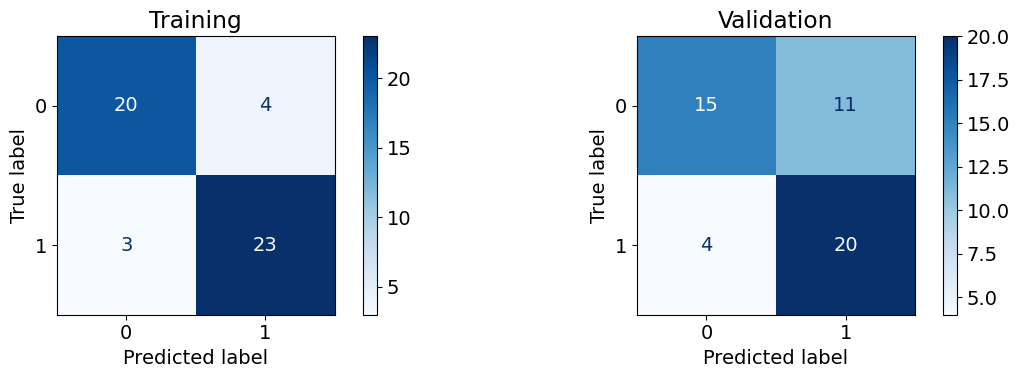

In [20]:
# Display the confusion matrices for 'gbt1' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(gbt1, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(gbt1, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation')
plt.tight_layout();

In [3]:
(4 + 11 /  (15 + 4 + 11 + 20)) * 100

422.0

### Sub-task 2 - Gradient Boosted Tree Model - II
For this sub-task, you will perform the following steps:
- Build a gradient boosted tree model for the data using the *LGBMClassifier()* method and tune it on the number of estimators, maximum tree depth and learning rate parameters using the *GridSearchCV()* method
- Visualize the confusion matrices for the training and validation sets

In [22]:
# Initialize a basic gradient boosted tree object using the 'LGBMClassifier()' method
# Hint: Study the documentation of the 'LGBMClassifier()' method
# Note: Use 'random_state = 0'
base_gbt_model = LGBMClassifier(random_state=0)

# Define the range of the 'n_estimators', the 'max_depth' and the 'learning_rate' parameters and store them in a parameter grid dictionary
parameters_grid = {'n_estimators': np.arange(5, 55, 5),
                   'max_depth': np.arange(2, 5, 1),
                   'learning_rate': np.arange(0.1, 0.4, 0.1)}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
# Hint: Study the documentation of the 'GridSearchCV()' method
# Hint: The 'estimator' parameter should be set to the base gradient boosted tree model on which tuning is to be performed
# Hint: The 'param_grid' parameter should be set to the grid of parameters on which tuning is to be performed
# Note: Use 'scoring = accuracy' and 'cv = 2'
grid = GridSearchCV(estimator=base_gbt_model, param_grid=parameters_grid, scoring='accuracy', cv=2)

# Train a model using the training data
# Note: Execution times for grid searches are exponentially proportional to the number of hyperparameters being tuned for
# Note: This cell might take a few minutes to run
gbt2 = grid.fit(X_train, y_train)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 13, number of negative: 12
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 25, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.520000 -> initscore=0.080043
[LightGBM] [Info] Start training from score 0.080043
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because the

In [24]:
# Print the optimal value of 'n_estimators', 'max_depth' and 'learning_rate' obtained from 'gbt2'
# Hint: Use the 'best_params_' attribute of the 'gbt2' object and look for 'n_estimators', 'max_depth' and 'learning_rate'
best_n_estimators = gbt2.best_params_['n_estimators']
best_max_depth = gbt2.best_params_['max_depth']
best_learning_rate = gbt2.best_params_['learning_rate']

print('The optimal value of n_estimators is', best_n_estimators)
print('The optimal value of learning_rate is', best_learning_rate)
print('The optimal value of max_depth is', best_max_depth)

The optimal value of n_estimators is 5
The optimal value of learning_rate is 0.1
The optimal value of max_depth is 2


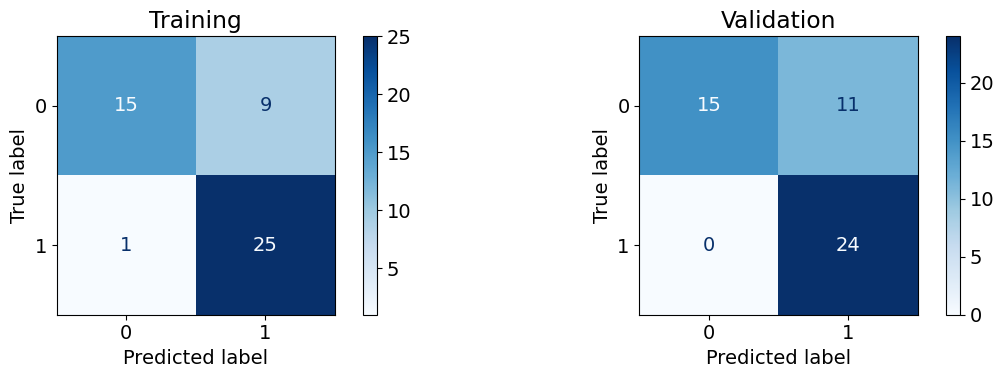

In [25]:
# Display the confusion matrices for 'gbt2' on the training and validation data
# Hint: Study the documentation of the 'ConfusionMatrixDisplay.from_estimator()' method
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ConfusionMatrixDisplay.from_estimator(gbt2, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(gbt2, X_val, y_val, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Validation')
plt.tight_layout();

In [2]:
(0 + 11 /  (15 + 0 + 11 + 24)) * 100

22.0

# Task 3 - Comparing the Models
For this task, you will perform the following steps:
- Compare various classification performance metrics for the six tree models that you have built
- Compare the ROC curves for these six models

In [30]:
# Calculate and print various classification performance measures for all the models on the training and validation data
# Hint: You will need to obtain the predicted class labels for each of the models using the 'predict()' method
# Hint: You will need to obtain the predicted probabilities for each of the models using the 'predict_proba()' method

# Hint: Study the documentations of the different peformance metrics methods
# Note: For F1 score, specify the 'pos_label' parameter as 'Unsweetened'

# Compute predicted probabilities and class labels for each of the models on the training and validation data
# Hint: The second column of the matrix returned by the 'predict_proba()' method contains the positive class probabilities

models = [rf1, rf2, gbt1, gbt2]
modelnames = ['rf1', 'rf2', 'gbt1', 'gbt2']

train_probabilities = [None] * len(models)
val_probabilities = [None] * len(models)
train_y_pred = [None] * len(models)
val_y_pred = [None] * len(models)

i = -1
for model in models:
    i = i + 1
    train_probabilities[i] = models[i].predict_proba(X_train)[:, 1]
    val_probabilities[i] = models[i].predict_proba(X_val)[:, 1]
    train_y_pred[i] = models[i].predict(X_train)
    val_y_pred[i] = models[i].predict(X_val)

# Use the predicted class labels to compute the following performance metrics

# Compute the accuracies
train_acc = [None] * len(models)
val_acc = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_acc[i] = accuracy_score(y_train, train_y_pred[i])
    val_acc[i] = accuracy_score(y_val, val_y_pred[i])


# Compute the F1 scores
train_f1 = [None] * len(models)
val_f1 = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_f1[i] = f1_score(y_train, train_y_pred[i], pos_label=1)
    val_f1[i] = f1_score(y_val,val_y_pred[i], pos_label=1)

# Use the predicted probabilities to compute the ROC AUC scores

# Compute the ROC AUC scores
train_auc = [None] * len(models)
val_auc = [None] * len(models)
for i in np.arange(0, len(models), 1):
    train_auc[i] = roc_auc_score(y_train, train_probabilities[i])
    val_auc[i] = roc_auc_score(y_val, val_probabilities[i])

# Summarize the above metrics for all the models using a single data frame and display it
modelcompare = pd.DataFrame(data = {'Training Accuracy': train_acc,
                                    'Validation Accuracy': val_acc,
                                    'Training F1 Score': train_f1,
                                    'Validation F1 Score': val_f1,
                                    'Training ROC AUC Score': train_auc,
                                    'Validation ROC AUC Score': val_auc},
                            index = modelnames)

modelcompare

,Training Accuracy,Validation Accuracy,Training F1 Score,Validation F1 Score,Training ROC AUC Score,Validation ROC AUC Score
rf1,1.00,0.78,1.000000,0.775510,1.000000,0.876603
rf2,0.90,0.84,0.905660,0.818182,0.980769,0.919872
gbt1,0.86,0.70,0.867925,0.727273,0.956731,0.887821
gbt2,0.80,0.78,0.833333,0.813559,0.894231,0.850962


# Task 4 - Misclassification Costs of Suitable Model
For this task, you will perform the following steps:
- Select a model based on their classification performance measures
- Compute the baseline misclassification cost
- Obtain the best misclassification cost and the associated cut-off from the training data
- Compute the potentially best misclassification cost of the model using the validation data

Note: Suppose that the problem statement requires that your classification model satisfies the following conditions:
- The absolute value of the difference between the training and the validation accuracies is less than 0.2
- The validation accuracy is greater than 0.8
- The absolute value of the difference between the training and the validation ROC AUC scores is less than 0.2
- The validation ROC AUC score is greater than 0.8
- The validation F1 score is greater than 0.8

In [36]:
filter_condition = (
    abs(modelcompare['Training Accuracy'] - modelcompare['Validation Accuracy']) < 0.2) & (
    modelcompare['Validation Accuracy'] > 0.8) & (
    abs(modelcompare['Training ROC AUC Score'] - modelcompare['Validation ROC AUC Score']) < 0.2) & (
    modelcompare['Validation ROC AUC Score'] > 0.8) & (
    modelcompare['Validation F1 Score'] > 0.8)

In [37]:
# Using the conditions on the performance measures, select the better model
# Hint: Use the 'modelcompare' data frame that you created to obtain the name of the best model
best_model_name = modelcompare[filter_condition].index[0]

print('The model better suited to the conditions of the problem statement is "{}".'.format(best_model_name))

The model better suited to the conditions of the problem statement is "rf2".


In [38]:
# Declare the cost of false positives and false negatives
# Note: The model will be used to send invitations to customers who potentially prefer unsweetened tea for a reveal party
# Note: The cost of false positives and false negatives are provided to you for this exercise
# Note: Labeling a customer who prefers sweetened tea as 'Unsweetened' leads to just sending a wrong invitation, so its cost is less
# Note: Labeling a customer who prefers unsweetened tea as 'Sweetened' leads to losing out on a potential customer, so its cost is more
fp_cost = 300
fn_cost = 1000

In [41]:
unsweetened_label = 1
sweetened_label = 0

In [44]:
y_pred_train = train_y_pred[1]
y_pred_val = val_y_pred[1]

In [45]:
# Calculate the misclassification cost for the naive model on the training and the validation data
# Hint: The naive model in this case would classify everyone as preferring unsweetened tea or class 'Unsweetened'
# Hint: That means all class 'Unsweetened' people are classified as class 'Unsweetened' accurately
# Hint: The class 'Sweetened' people are the only ones that contribute to the misclassification
# Hint: So, you need to count how many 'y_train' and 'y_val' values are actually class 'Sweetened', since all of them are labeled as class 'Unsweetened'
# Hint: Recall the formula for the misclassification cost
# Calculate the number of false positives (instances incorrectly classified as 'Unsweetened')
false_positives_train = sum((y_train == unsweetened_label) & (y_pred_train == sweetened_label))
false_positives_val = sum((y_val == unsweetened_label) & (y_pred_val == sweetened_label))

# Calculate the number of false negatives (instances incorrectly classified as 'Sweetened')
false_negatives_train = sum((y_train == sweetened_label) & (y_pred_train == unsweetened_label))
false_negatives_val = sum((y_val == sweetened_label) & (y_pred_val == unsweetened_label))

# Compute the misclassification cost
misclassification_cost_train = false_positives_train * fp_cost + false_negatives_train * fn_cost
misclassification_cost_val = false_positives_val * fp_cost + false_negatives_val * fn_cost

print('The misclassification cost of classifying everyone in the training data as preferring unsweetened tea = {} dollars'.format(misclassification_cost_train))
print('The misclassification cost of classifying everyone in the validation data as preferring unsweetened tea = {} dollars'.format(misclassification_cost_val))

The misclassification cost of classifying everyone in the training data as preferring unsweetened tea = 3600 dollars
The misclassification cost of classifying everyone in the validation data as preferring unsweetened tea = 3800 dollars


In [ ]:
# Generate a list of misclassification costs for various cut-off values for the selected tree model on the training and the validation data
# Hint: If the 'train_probabilities' or the 'val_probabilities' value is greater than the cut-off, then the label is class 'Unsweetened', else it's class 'Sweetened'
# Hint: Try using the 'np.where()' method to obtain the predictions for each cut-off value
# Hint: Study the documentation of the 'confusion_matrix()' method to obtain the false positive and false negative counts
# Hint: Recall the formula for the misclassification cost
train_mc_cost = []
val_mc_cost = []
cutoffs = np.arange(0, 1, 0.01)
for cutoff in cutoffs:
    train_y_pred_curr = ########## CODE HERE ##########
    train_curr_cf = confusion_matrix(########## CODE HERE ##########)
    train_fp_count = ########## CODE HERE ##########
    train_fn_count = ########## CODE HERE ##########
    train_mc_cost_current = ########## CODE HERE ##########
    train_mc_cost.append(train_mc_cost_current)
    
    val_y_pred_curr = ########## CODE HERE ##########
    val_curr_cf = confusion_matrix(########## CODE HERE ##########)
    val_fp_count = ########## CODE HERE ##########
    val_fn_count = ########## CODE HERE ##########
    val_mc_cost_current = ########## CODE HERE ##########
    val_mc_cost.append(val_mc_cost_current)

In [46]:
# Initialize lists to store misclassification costs for training and validation data
train_mc_cost = []
val_mc_cost = []

# Generate cut-off values from 0 to 1 with a step size of 0.01
cutoffs = np.arange(0, 1, 0.01)

# Loop through each cut-off value
for cutoff in cutoffs:
    # Predict class labels for the training data based on the current cut-off
    train_y_pred_curr = np.where(train_probabilities > cutoff, unsweetened_label, sweetened_label)
    
    # Compute the confusion matrix for the training data based on the current predictions
    train_curr_cf = confusion_matrix(y_train, train_y_pred_curr)
    
    # Extract false positive and false negative counts from the confusion matrix
    train_fp_count = train_curr_cf[0][1]
    train_fn_count = train_curr_cf[1][0]
    
    # Compute the misclassification cost for the training data based on the current cut-off
    train_mc_cost_current = train_fp_count * fp_cost + train_fn_count * fn_cost
    
    # Append the misclassification cost to the list
    train_mc_cost.append(train_mc_cost_current)
    
    # Predict class labels for the validation data based on the current cut-off
    val_y_pred_curr = np.where(val_probabilities > cutoff, unsweetened_label, sweetened_label)
    
    # Compute the confusion matrix for the validation data based on the current predictions
    val_curr_cf = confusion_matrix(y_val, val_y_pred_curr)
    
    # Extract false positive and false negative counts from the confusion matrix
    val_fp_count = val_curr_cf[0][1]
    val_fn_count = val_curr_cf[1][0]
    
    # Compute the misclassification cost for the validation data based on the current cut-off
    val_mc_cost_current = val_fp_count * fp_cost + val_fn_count * fn_cost
    
    # Append the misclassification cost to the list
    val_mc_cost.append(val_mc_cost_current)

ValueError: Found input variables with inconsistent numbers of samples: [50, 4]

In [ ]:
# Use the cut-off associated with the minimum misclassification cost on the training data to get the best cost for the validation data
# Hint: The expected best misclassification cost on the validation data is the cost associated with the best cut-off from the training data
# Note: The best cut-off for the training data is the cut-off associated with the minimum misclassification cost for the training data
val_best_cost = ########## CODE HERE ##########

print('Best misclassification cost on the validation data for the model = {} dollars'.format(val_best_cost))